# Reto: Costo Póliza de Seguro por Marco Armando Escobar Arrazola
## Duración: 2.5 h
## ✍🏻 Objetivo:
Al realizar el análisis de las variables clave en un problema a resolver:
1) Podrás conocer la forma de tomar decisiones de acuerdo con la naturaleza de la variable que estás estudiando, ya sea cuantitativa o categórica, así como el tipo de escala.
2) Seleccionarás las herramientas para visualizar medidas estadísticas como: pruebas de hipótesis de un conjunto de dato bidimensionales
para describir el comportamiento de una población y el nivel de dependencia de las variables.
3) Podrás construir un resumen ejecutivo que muestre los comportamientos de las variables importantes en tu análisis.
## 📊 Introducción:
Comprar un auto involucra saber qué factores influyen en el precio para poder tomar las decisiones más adecuadas y hacer rendir el presupuesto.

## 🏆 Instrucciones:
**El reto será una continuación del caso visto en la sección de prácticas. Ahora Erick cuenta con una base de datos más completa de 1138 registros, lo cual le permitirá realizar una validación de los resultados obtenidos previamente e identificar otros puntos clave del análisis.**  
1) Descarga el archivo pdf llamado Caso Costo de Pólizas, ya que en éste se
presentan diversos análisis y estadísticas descriptivas que debes analizar para
construir un reporte ejecutivo con un análisis del segmento de mercado de
pacientes con Pólizas de Seguro.
2) Descarga los estadísticos que se muestran en el documento Insurance-Reto,
para profundizar más en el conocimiento de los datos.
3) Copia, pega y contesta, en un documento de edición de texto, cada uno de
los puntos que se solicitan a continuación, basándote en los 2 archivos del punto 1 y 2:

### **PASO 1. Clasificar cada una de las variables:** 
Dada la lista de variables, clasifícalas en cuantitativas o categóricas. Además de mostrar su escala: nominal, ordinal, intervalo o razón.

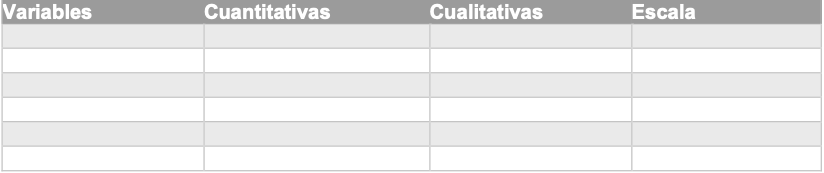

### **PASO 2. Validar supuestos:**
Realizar un proceso de análisis similar al realizado en la sección de práctica:
1) El monto promedio que una persona paga por su póliza de seguros es menor de $9480 dólares
2) Basándote en el índice de masa corporal, detectar si las mujeres cuidan más de su salud.
3) El costo de la póliza aumenta conforme la cantidad de hijos del contratante.
4) Determinar si existe relación entre el género del contratante y la cantidad de hijos.

### **PASO 3. Realizar un análisis adicional:**
Determinar si existe relación entre el costo de la póliza y si el contratante es fumador o no.

### **PASO 4. Construir un resumen ejecutivo:**
Resalta los hallazgos más importantes del análisis que realizaste en función de una comparación contra los resultados del ejercicio de la práctica. Además, sugiere a Erick los factores clave en el análisis del perfil de los pacientes con seguro justificando su importancia.

## 📝 Evaluación:
Tu reporte será evaluado con base al cumplimiento de los requerimientos y a su contenido, pero también por su presentación, por lo que errores ortográficos o de redacción serán penalizados.

## ‼️ Formato de entrega de la actividad:
Lo primero que debes hacer es generar una copia de este documento y editarla con tu nombre de la siguiente manera: **C5SC2_Reto_APELLIDOS_NOMBRE**. Una vez terminado el reto entrega tu actividad vas a subir el documento de edición
de texto con tus datos presionando el ícono

### **Descargamos la paquetería necesaria** 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import pingouin as pg
import openpyxl

#Prueba de Normalidad
from scipy.stats import shapiro
import scipy.stats as stats 

### **Importamos la base de datos de estudio** 

In [4]:
df = pd.read_excel("/Users/marcoescobararrazola/Downloads/Insurance-Reto.xlsx", sheet_name="Datos Costo Póliza")
df

,Edad del contratante,Género,Indice de masa corporal,Cantidad de hijos,Fumador,Costo Póliza
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,33,male,22.705,0,no,21984.47061
3,32,male,28.880,0,no,3866.85520
4,31,female,25.740,0,no,3756.62160
...,...,...,...,...,...,...
1133,23,female,33.400,0,no,10795.93733
1134,18,female,31.920,0,no,2205.98080
1135,18,female,36.850,0,no,1629.83350
1136,21,female,25.800,0,no,2007.94500


In [5]:
round(df.describe(), 2)

,Edad del contratante,Indice de masa corporal,Cantidad de hijos,Costo Póliza
count,1138.00,1138.00,1138.00,1138.00
mean,38.94,30.66,0.71,13040.97
std,14.35,6.16,0.79,12191.32
min,18.00,15.96,0.00,1121.87
25%,26.00,26.22,0.00,4349.73
50%,39.00,30.40,0.00,9159.35
75%,51.00,34.80,1.00,16281.60
max,64.00,53.13,2.00,63770.43


### **PASO 1. Clasificar cada una de las variables:** 

In [6]:
Clasificador = pd.DataFrame({
    'Variables': [
        'Edad del contratante',
        'Género',
        'Indice de masa corporal',
        'Cantidad de hijos',
        'Fumador',
        'Costo Póliza'
    ],
    'Cuantitativas': ['Si','No','Si','Si','No','Si'],
    'Cualitativas':  ['No','Si','No','Si','Si','No'],
    'Escala': [
        'Discreta - De razón',
        'Nominal',
        'Continua - De razón',
        'Discreta - De razón',
        'Nominal',
        'Continua - De razón'
    ]
})

In [7]:
Clasificador

,Variables,Cuantitativas,Cualitativas,Escala
0,Edad del contratante,Si,No,Discreta - De razón
1,Género,No,Si,Nominal
2,Indice de masa corporal,Si,No,Continua - De razón
3,Cantidad de hijos,Si,Si,Discreta - De razón
4,Fumador,No,Si,Nominal
5,Costo Póliza,Si,No,Continua - De razón


## **PASO 2. Validar supuestos:**

### EJERCICIO No. 1: El monto promedio que una persona paga por su póliza de seguros es menor de $9480 dólares

Pregunta: ¿El monto promedio que una persona paga por la póliza de seguros es estadísticamente significativamente menor que los $9480 dólares que se pagan en promedio en la población?

#### 1) Definimos $H_0$ y $H_1$
- $H_0$: el promedio de pago de una poliza es igual al promedio de 9480 dolares $\rightarrow \bar{x} = \mu$
- $H_1$: el promedio de [ago de una poliza es **menor** que al proedio de 9480 dolares $\rightarrow \bar{x} < \mu$

#### 2) Definimos población y estadístico:
Población normal con sigma desconocido. Dado que sigma es desconocido utilizamos estadístico **t-student**

1) $\mu$ = 9480 dolares (Población)
2) $\bar{x}$ = 13040.97 dolares (Muestra)

#### 3) Definimos $\alpha$:
$\alpha$: 0.05

Nota: Herramienta interesante en para evaluar algún estadistico. 
**Normal Distribution Calculator:** https://www.infrrr.com/distributions/normal-distributions

#### **EXTRA:** Definimos la potencia de la prueba (1-$\beta$) y el tamaño de la muestra($n$):

Comencemos definiendo el tamaño del efecto ($d$):

- 0.2: efecto "pequeño"
- 0.5: efecto "mediano"
- 0.8: efecto "grande"
 

In [6]:
from statsmodels.stats.power import TTestPower

d = -0.6 # Tamaño del efecto negativo porque es unilateral izquierdo
potencia = 0.9
alpha = 0.05

# Instancia de TTestPower
analisis = TTestPower()

# Cálculo del tamaño de la muestra
n = analisis.solve_power(
    effect_size = d,
    power = potencia,
    alpha = alpha,
    alternative = 'smaller', 
)
print(f"Tamaño de la muestra: {n}")
print(f'Es decir que para un efecto de {d} y una potencia de la prueba de {0.9} requerimos al menos {round(n, 2)}')
print(f'Es importante destacar que nuestro tamaño de muestra supera fácilmente esto, con una n de {len(df)}')

Tamaño de la muestra: 25.204698829837483
Es decir que para un efecto de -0.6 y una potencia de la prueba de 0.9 requerimos al menos 25.2
Es importante destacar que nuestro tamaño de muestra supera fácilmente esto, con una n de 1138


In [7]:
# Calculemos y almacenemos la media, la desviación estándar y el tamaño de la muestra que serán requeridos para la prueba t:
x = round(np.mean(df['Costo Póliza']),2)
s = round(np.std(df['Costo Póliza']),2)
n = len(df)

print(f"Media muestral (x): {x}")
print(f"Desviación estándar muestral (s): {s}")
print(f"Tamaño de la muestra (n): {n}")

Media muestral (x): 13040.97
Desviación estándar muestral (s): 12185.97
Tamaño de la muestra (n): 1138


In [8]:
# Verificamos la normalidad de nuestros datos
W, p_shapiro = shapiro(df['Costo Póliza'])
print(p_shapiro)
print('Es importante destacar que nuestros datos no siguen una distribución normal: Nuestro valor de p es menor a 0.05 y por lo tanto se rechaza la hipótesis nula que indica ddistribución normal')

2.0425435393207283e-34
Es importante destacar que nuestros datos no siguen una distribución normal: Nuestro valor de p es menor a 0.05 y por lo tanto se rechaza la hipótesis nula que indica ddistribución normal


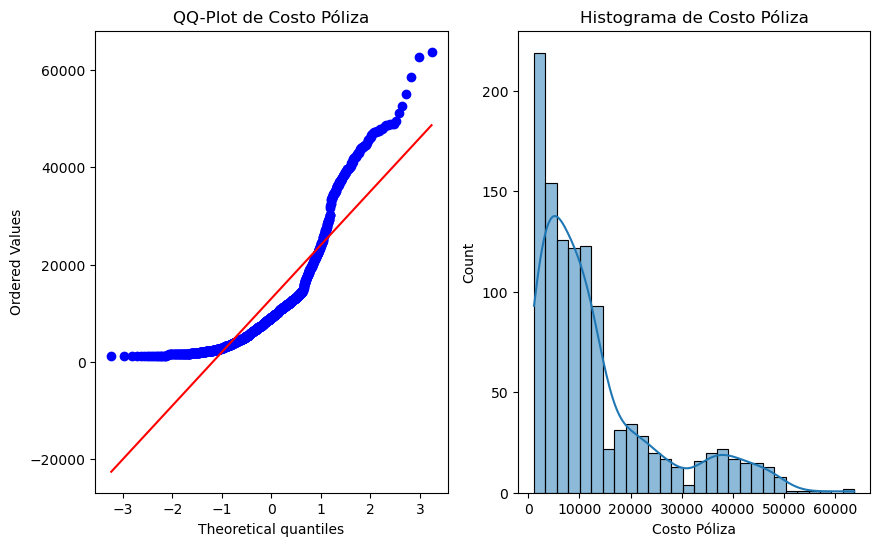

In [24]:
# Graficamos la normalidad de nuestros datos
# QQ-plot e histograma de la variable Costo Póliza
fig, ax = plt.subplots(1,2, figsize = (10,6))
stats.probplot(df['Costo Póliza'], dist="norm", plot=ax[0])
ax[0].set_title("QQ-Plot de Costo Póliza")
sns.histplot(df['Costo Póliza'], kde=True, ax = ax[1])
ax[1].set_title("Histograma de Costo Póliza")
plt.show()

Es evidente que el estadistico de t se encuentra hasta el otro extremos de la zona de rechazo, no se rechaza la hipótesis nula


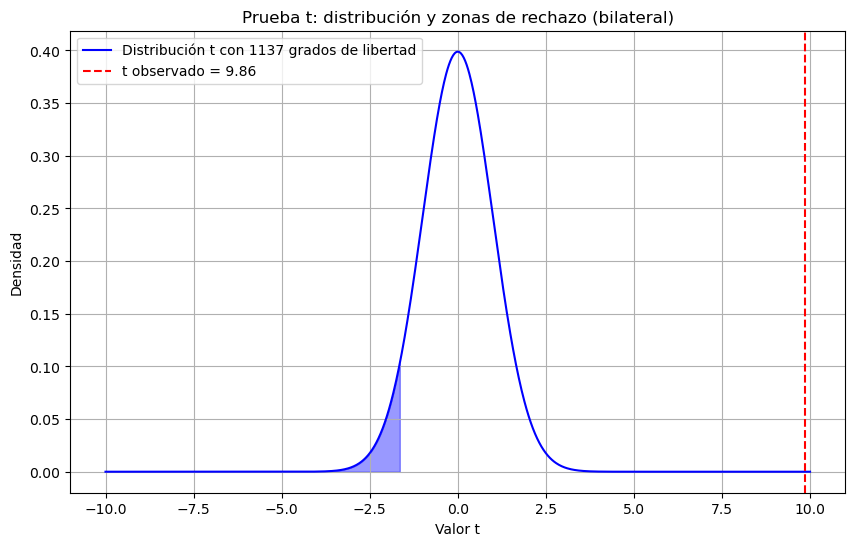

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import t # La distribución t
import numpy as np

# Parámetros
alpha = 0.05
gl = n - 1 # Grados de libertad

# Rango de valores t y PDF
t_vals = np.linspace(-10, 10, 1000)
pdf_vals = t.pdf(t_vals, gl) # Distribución t para "gl" grados de libertad

# Puntos críticos para alfa bilateral derecha
t_critico_izq = t.ppf(alpha, gl) # Zona de rechazo izquierda ASUMIENDO DISTRIBUCIÓN CON "df" GRADOS DE LIBERTAD

# Graficar la distribución
plt.figure(figsize=(10, 6))
plt.plot(t_vals, pdf_vals, label=f"Distribución t con {gl} grados de libertad", color='blue')

# Zonas de rechazo izquierda y derecha
t_rechazo_izq = np.linspace(-5, t_critico_izq, 100) 
plt.fill_between(t_rechazo_izq, t.pdf(t_rechazo_izq, gl), color='blue', alpha=0.4)

# Calcular la estadística de esta prueba
tval = (x-9480)/(s/np.sqrt(n))

# Y dibujar esta estadística en la distribución anterior
plt.axvline(tval, color='red', linestyle='--', label=f't observado = {tval:.2f}')

# Etiquetas
plt.title('Prueba t: distribución y zonas de rechazo (bilateral)')
plt.xlabel('Valor t')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
print('Es evidente que el estadistico de t se encuentra hasta el otro extremos de la zona de rechazo, no se rechaza la hipótesis nula')

In [30]:
from pingouin import ttest

resultado = ttest(
    x = df['Costo Póliza'].values, # la muestra
    y = 9480, # la media poblacional (mu)
    paired = 'False', # NO será una prueba pareada
    alternative = 'less', # Unilateral izquierda
    )

print(f"Estadística t: {resultado['T'].values[0]}")
print(f"Valor p: {resultado['p-val'].values[0]}")
print(f"Tamaño del efecto actualizado: {resultado['cohen-d'].values[0]}")
print(f"Potencia de la prueba actualizada: {resultado['power'].values[0]}")

Estadística t: 9.853459446924205
Valor p: 1.0
Tamaño del efecto actualizado: 0.2920906145846753
Potencia de la prueba actualizada: 1.5721415800669329e-30


/Users/marcoescobararrazola/miniforge3/lib/python3.12/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


### EJERCICIO No. 2: Basándote en el índice de masa corporal, detecta si las mujeres cuidan más de su salud.

Pregunta: ¿Las mujeres presentan un promedio de IBM significativamente menor que el promedio de IBM de los hombres?

#### 1) Definimos $H_0$ y $H_1$
- $H_0$: la diferencia en el IBM promedio de hombres y mujeres no es diferente $\mu_F - \mu_M = 0$
- $H_1$: la diferencia en el IBM promedio de hombres es mayor al IBM promedio de mujeres  $\mu_F - \mu_M < 0$



In [12]:

Male = df[df['Género'] == 'male']['Indice de masa corporal']
Female = df[df['Género'] == 'female']['Indice de masa corporal']
x_male = round(Male.mean(),2)
s_male = round(Male.std(),2)

x_female = round(Female.mean(),2) 
s_female = round(Female.std(),2)
print('=='*40)
print(f'Media de IBM en hombres: {x_male}')
print(f'Desviación estándar de IBM en hombres {s_male}')
print(f'Numero de muestras en hombres: {len(Male)}')
print('=='*40)
print(f'Media de IBM en mujeres: {x_female}')
print(f'Desviación estándar de IBM en mujeres {s_female}')
print(f'Numero de muestras en mujeres:{len(Female)}')

Media de IBM en hombres: 30.98
Desviación estándar de IBM en hombres 6.24
Numero de muestras en hombres: 572
Media de IBM en mujeres: 30.34
Desviación estándar de IBM en mujeres 6.06
Numero de muestras en mujeres:566


#### 2) Definimos población y estadístico:
No conocemos la media y sigma de la población. Por lo tanto, utilizamos el estadístico **t-student** para dos muestras independientes. Una muestra Female y otras muestra Male

1) $\mu_m$ = 30.98
2) $\sigma_m$ = 6.24
3) $\mu_f$ = 30.34
4) $\sigma_f$ = 6.06

#### 3) Definimos $\alpha$:
$\alpha$: 0.05

Nota: Herramienta interesante en para evaluar algún estadistico. 
**Normal Distribution Calculator:** https://www.infrrr.com/distributions/normal-distributions

#### **EXTRA:** Definimos la potencia de la prueba (1-$\beta$) y el tamaño de la muestra($n$):

Comencemos definiendo el tamaño del efecto ($d$):

- 0.2: efecto "pequeño"
- 0.5: efecto "mediano"
- 0.8: efecto "grande"

In [40]:
from statsmodels.stats.power import TTestIndPower

# Definir tamaño del efecto, potencia de la prueba, alpha y ratio
d = -0.5
power = 0.9
alpha = 0.05
ratio = 1 # Asumiremos n1=n2 ya que son casi similares en proporcion

# Instancia de NormalIndPower
analisis = TTestIndPower()

# Y cálculo del tamaño de la muestra
n = analisis.solve_power(
    effect_size=d,
    alpha = alpha,
    power=power,
    alternative='smaller', # larger = unilateral derecho, smaller = unilateral izquierdo, two-sided: bilateral
    ratio = ratio # No estamos calculando proporción entre medias
)
print(f"Tamaño sugerido de cada muestra (n1=n2): {n}")

Tamaño sugerido de cada muestra (n1=n2): 69.1978218601091


Es decir que:

> **Para cada género debemos recolectar el IBM promedio de al menos 28 personas. Esto si queremos tener una potencia de la prueba de 0.9, un tamaño del efecto de 0.8 y un nivel de significancia de 0.05**

Vemos que el IBM promedio de los hombres es ligeramente superior al IBM de mujeres (30.98 IBM en hombres vs. 30.34 IBM en mujeres).

**La idea es aplicar el t-test de muestras independientes para determinar si un valor menor de IBM en mujeres es resultado de que las mujeres son más sanas que los hombres o es producto del azar**.

### PRUEBA DE NORMALIDAD: Test de shapiro, histograma y QQPlot

In [129]:
# Aplicamos prueba de normalidad a nuestros datos
from scipy.stats import shapiro

W1, p_shapiro1 = shapiro(Male)
W2, p_shapiro2 = shapiro(Female)
print(f"Shapiro test en Hombres: {p_shapiro1}, No cumple con una distribución normal (p>0.05)")
print(f"Shapiro test en Mujeres: {p_shapiro2} Cumple con distribución normal (p>0.05)")

Shapiro test en Hombres: 0.008043844042743392, No cumple con una distribución normal (p>0.05)
Shapiro test en Mujeres: 0.010867842574999502 Cumple con distribución normal (p>0.05)


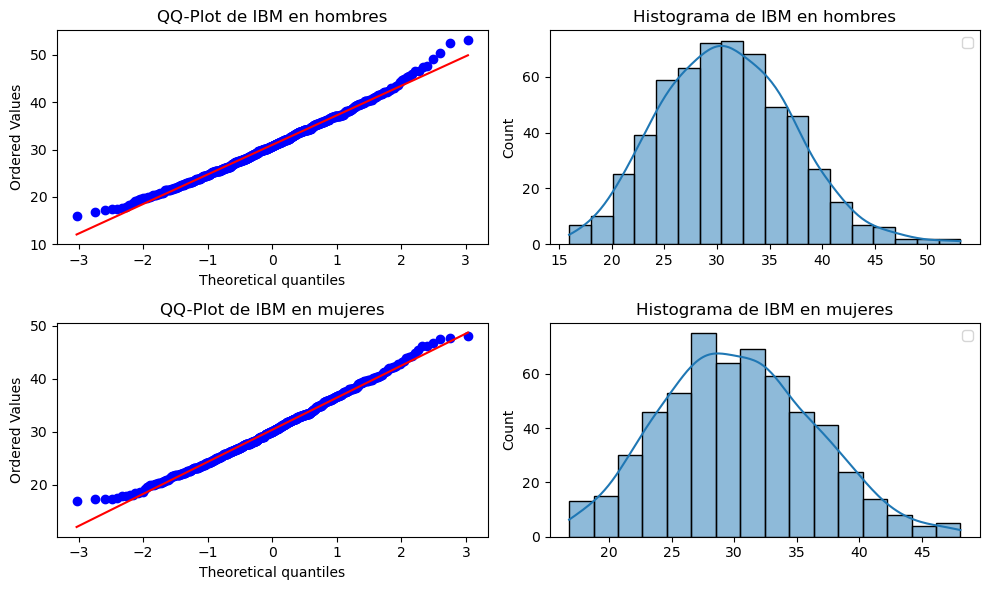

In [25]:
# Graficamos la normalidad de nuestros datos
# QQ-plot e histograma de la variable Costo Póliza
fig, ax = plt.subplots(2,2, figsize = (10,6))
stats.probplot(Male, dist="norm", plot=ax[0,0], )
ax[0,0].set_title("QQ-Plot de IBM en hombres")
sns.histplot(pd.DataFrame(Male), kde=True, ax = ax[0,1], )
ax[0,1].set_title("Histograma de IBM en hombres")
ax[0,1].legend('')
stats.probplot(Female, dist="norm", plot=ax[1,0])
ax[1,0].set_title("QQ-Plot de IBM en mujeres")
sns.histplot(pd.DataFrame(Female), kde=True, ax = ax[1,1])
ax[1,1].set_title("Histograma de IBM en mujeres")
ax[1,1].legend('')
plt.tight_layout()
plt.show()

Es evidente que el estadistico de t se encuentra hasta el otro extremos de la zona de rechazo, no se rechaza la hipótesis nula


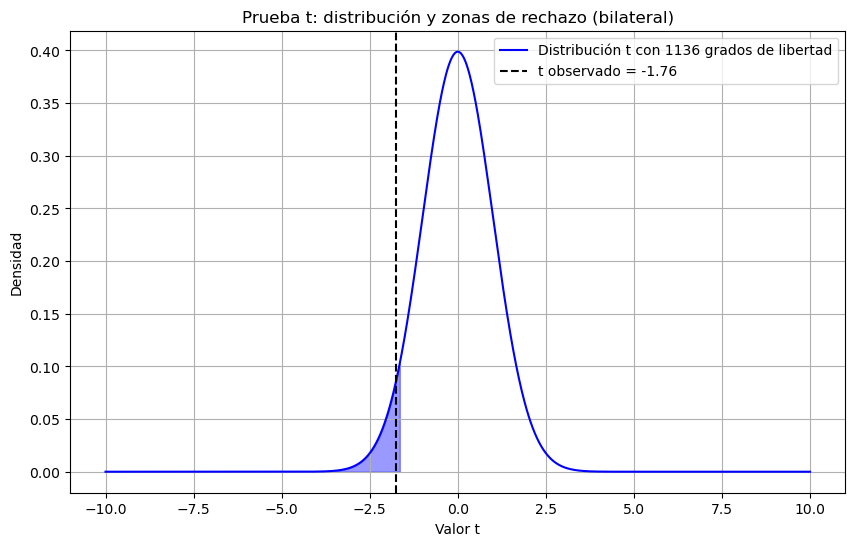

In [39]:
import matplotlib.pyplot as plt
from scipy.stats import t # La distribución t
import numpy as np

# Parámetros
alpha = 0.05
gl = len(Male) + len(Female) - 2 # Grados de libertad

# Rango de valores t y PDF
t_vals = np.linspace(-10, 10, 1000)
pdf_vals = t.pdf(t_vals, gl) # Distribución t para "gl" grados de libertad

# Puntos críticos para alfa bilateral derecha
t_critico_izq = t.ppf(alpha, gl) # Zona de rechazo izquierda ASUMIENDO DISTRIBUCIÓN CON "df" GRADOS DE LIBERTAD

# Graficar la distribución
plt.figure(figsize=(10, 6))
plt.plot(t_vals, pdf_vals, label=f"Distribución t con {gl} grados de libertad", color='blue')

# Zonas de rechazo izquierda y derecha
t_rechazo_izq = np.linspace(-10, t_critico_izq, 100) 
plt.fill_between(t_rechazo_izq, t.pdf(t_rechazo_izq, gl), color='blue', alpha=0.4)

# Calcular la estadística de esta prueba
tval = (x_female-x_male)/(np.sqrt((s_female)**2/len(Female) + (s_male)**2/len(Male)))

# Y dibujar esta estadística en la distribución anterior
plt.axvline(tval, color='black', linestyle='--', label=f't observado = {tval:.2f}')

# Etiquetas
plt.title('Prueba t: distribución y zonas de rechazo (bilateral)')
plt.xlabel('Valor t')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
print('Es evidente que el estadistico de t se encuentra hasta el otro extremos de la zona de rechazo, no se rechaza la hipótesis nula')

### Aplicar la prueba estadística para obtener el valor p

utilizamos nuevamente el módulo "ttest" de la librería Pingouin para aplicar esta prueba:


In [34]:
from pingouin import ttest

resultados = ttest(
    x = Female.values,
    y = Male.values, # El segundo arreglo es usualmente el de referencia
    paired = False, # Porque las muestras son independientes
    alternative = 'less', # Nos interesa ver si hubo incremento de la media de B con respecto a A
)
resultados


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.77561,1135.563825,less,0.038033,"[-inf, -0.05]",0.105255,0.629,0.551486


### EJERCICIO No. 3: El costo de la póliza aumenta conforme a la cantidad de hijos del contratante.

Pregunta: ¿El costo de la póliza incrementa de acuerdo al numero de hijo que tiene el contratante?

#### 1) Definimos $H_0$ y $H_1$
- $H_0$: Las medias del costo de la póliza en los grupos de contratantes con 0, 1 y 2 hijos son iguales $\mu_0 = \mu_1 = \mu_2$
- $H_1$: no todas las medias en el costo de la póliza en los grupos de contratantes con 0, 1, 2 hijos son iguales"



In [53]:
from statsmodels.stats.power import FTestAnovaPower

# Diseño del experimento
f = 0.4         # Esperamos obtener un tamaño del efecto grande
alpha = 0.05    # Nivel de significancia
power = 0.9     # Potencia esperada para la prueba
Ng = 3          # Número de grupos, que corresponde a los subniveles del factor (tipo de campaña)

# Instancia de FTestAnovaPower
analisis = FTestAnovaPower()

# Cálculo del número de muestras por grupo
n = analisis.solve_power(
    effect_size=f,
    alpha=alpha, 
    power=power, 
    k_groups=Ng
)
print(f"Tamaño mínimo de la muestra por cada grupo: {n}")

Tamaño mínimo de la muestra por cada grupo: 82.16510770892917


In [52]:
#grupo_1 = df[df['Cantidad de hijos'] == 0]
#grupo_1
media = df.groupby(by = 'Cantidad de hijos')['Costo Póliza'].mean()
std = df.groupby(by = 'Cantidad de hijos')['Costo Póliza'].std()

np.float64(12365.975601635888)

### Prueba de normalidad de los tres grupos

In [54]:
from scipy.stats import shapiro

niveles = df['Cantidad de hijos'].unique() # 0, 1, 2 hijos
for nivel in niveles:
    # Extraer la agrupación
    grupo = df.loc[df['Cantidad de hijos']== nivel,'Costo Póliza']

    # Aplicar prueba de shapiro
    W, p_shapiro = shapiro(grupo)

    # E imprimir resultado
    print(f"Grupo {nivel} - p = {p_shapiro}")

Grupo 0 - p = 4.928874820117834e-25
Grupo 1 - p = 8.852445660276679e-21
Grupo 2 - p = 4.782895921601787e-17


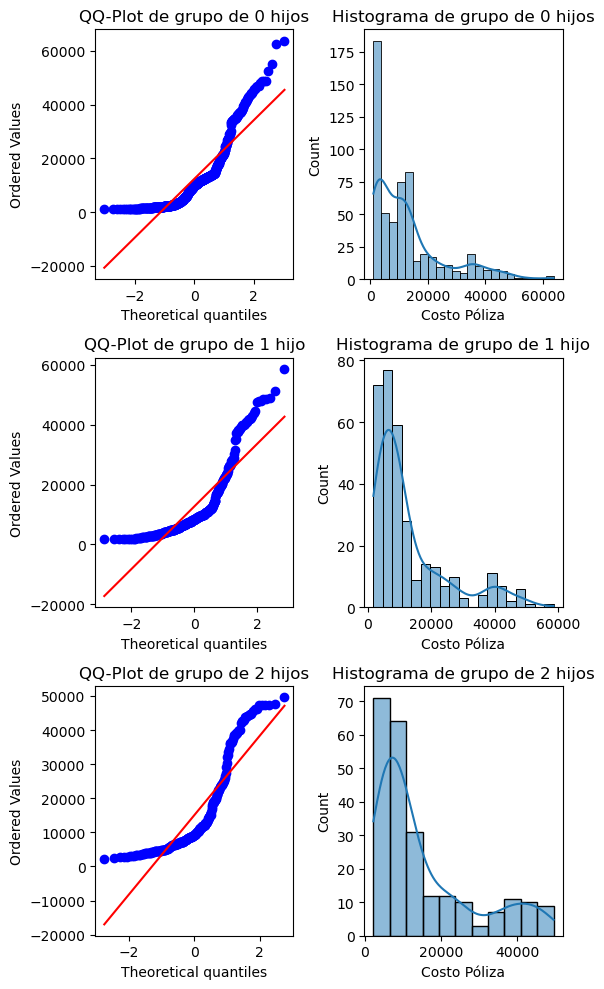

In [61]:
fig, ax = plt.subplots(3, 2, figsize = (6, 10))
stats.probplot(df.loc[df['Cantidad de hijos']== 0,'Costo Póliza'], dist="norm", plot=ax[0,0], )
ax[0,0].set_title("QQ-Plot de grupo de 0 hijos")
sns.histplot(df.loc[df['Cantidad de hijos']== 0,'Costo Póliza'], kde=True, ax = ax[0,1], )
ax[0,1].set_title("Histograma de grupo de 0 hijos")

stats.probplot(df.loc[df['Cantidad de hijos']== 1,'Costo Póliza'], dist="norm", plot=ax[1,0], )
ax[1,0].set_title("QQ-Plot de grupo de 1 hijo")
sns.histplot(df.loc[df['Cantidad de hijos']== 1,'Costo Póliza'], kde=True, ax = ax[1,1], )
ax[1,1].set_title("Histograma de grupo de 1 hijo")

stats.probplot(df.loc[df['Cantidad de hijos']== 2,'Costo Póliza'], dist="norm", plot=ax[2,0], )
ax[2,0].set_title("QQ-Plot de grupo de 2 hijos")
sns.histplot(df.loc[df['Cantidad de hijos']== 2,'Costo Póliza'], kde=True, ax = ax[2,1], )
ax[2,1].set_title("Histograma de grupo de 2 hijos")
plt.tight_layout()

### Prueba de homocedasticidad de los tres grupos (varianzas iguales): Prueba de Bartlett

In [65]:
from scipy.stats import bartlett

niveles = df['Cantidad de hijos'].unique() # 0, 1, 2 hijos

# Extraer los grupos como arreglos de NumPy
grupos = []
for nivel in niveles:
    grupo = df.loc[df['Cantidad de hijos']== nivel,'Costo Póliza'].to_numpy()
    grupos.append(grupo)

# Y apliquemos la prueba de Bartlett
B, pb = bartlett(*grupos)

# Imprimir resultados
print(f"Prueba de Bartlett para las agrupaciones:")
print(f"  p = {pb:.4f} {'❌ Rechazar H₀ (p<0.05): heterocedasticidad' if pb < 0.05 else '✅ No se rechaza H₀ (p>=0.05): homocedasticidad'}\n")

Prueba de Bartlett para las agrupaciones:
  p = 0.3109 ✅ No se rechaza H₀ (p>=0.05): homocedasticidad



### Apliar la prueba estadística de ANOVA para obtener el estadístico F y el valor p

In [68]:
from pingouin import anova
datos = df[['Cantidad de hijos', 'Costo Póliza']]

resultados = anova(
    data = datos, # El dataset
    dv = 'Costo Póliza', # Observaciones (variable numérica)
    between = 'Cantidad de hijos', # Columna con el factor
    detailed = True, # Entregar resultados detallados
    effsize = 'n2', # Calcular el tamaño del efecto como eta cuadrado
)
resultados

,Source,SS,DF,MS,F,p-unc,n2
0,Cantidad de hijos,1.284165e+09,2,6.420826e+08,4.345477,0.013182,0.007599
1,Within,1.677063e+11,1135,1.477588e+08,NaN,NaN,NaN


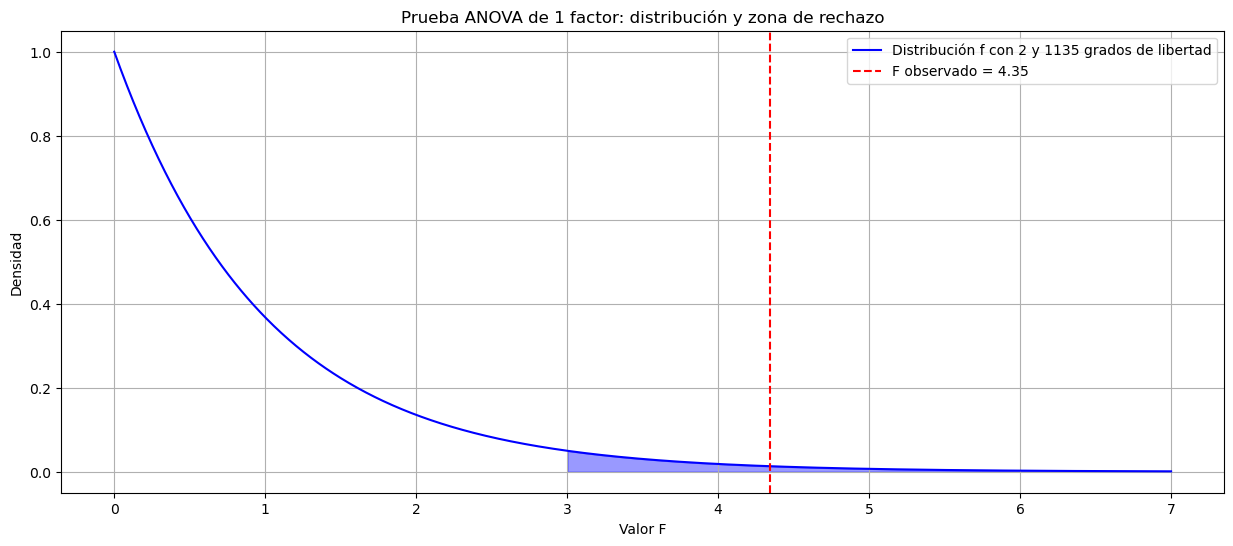

In [71]:
import matplotlib.pyplot as plt
from scipy.stats import f # La distribución f especifica de ANOVA
import numpy as np

# Grados de libertad y valor de f
dof_inter = resultados.loc[0,'DF']
dof_intra = resultados.loc[1,'DF']
fval = resultados.loc[0,'F']
alpha = 0.05

# Distribución F para los "dof / Grados de libertad" obtenidos
f_vals = np.linspace(0, 7, 1000) # Recordemos que F SIEMPRE es positivo
pdf_vals = f.pdf(f_vals, dof_inter, dof_intra) # Distribución f

# Punto crítico para alfa
f_critico_der = f.ppf(1-alpha, dof_inter, dof_intra) # Recordemos que ANOVA SIEMPRE será prueba unilateral derecha

# Graficar la distribución
plt.figure(figsize=(15, 6))
plt.plot(f_vals, pdf_vals, label=f"Distribución f con {int(dof_inter)} y {int(dof_intra)} grados de libertad", color='blue')

# Zona de rechazo derecha
f_rechazo_der = np.linspace(f_critico_der, 7, 100) # Irá desde f_critico_der hasta 20, 100 datos
plt.fill_between(f_rechazo_der, f.pdf(f_rechazo_der, dof_inter, dof_intra), color='blue', alpha=0.4)

# Dibujar estadística f en la distribución anterior
plt.axvline(fval, color='red', linestyle='--', label=f'F observado = {fval:.2f}')

# Etiquetas
plt.title('Prueba ANOVA de 1 factor: distribución y zona de rechazo')
plt.xlabel('Valor F')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)

### Evaluar el tamaño del efecto y la potencia de la prueba actualizadas: 
En este caso "pingouin":

- Calcula $\eta^2$ pero no el tamaño F-Cohen (tendremos que calcularlo)
- No retorna la potencia de la prueba (pero la podemos calcular con "statsmodels")

Veamos cómo hacer estos cálculos. Comencemos con el tamaño del efecto F-Cohen:

In [75]:
n2 = resultados.loc[0,'n2']
f_cohen = np.sqrt(n2/(1-n2))

# Instancia
analisis = FTestAnovaPower()

# Calcular potencia
potencia = analisis.power(
    effect_size = f_cohen, # El tamaño F-Cohen que acabamos de calcular
    nobs = len(df), # El número total de datos (combinando los tres grupos)
    alpha = 0.05, # El nivel de significancia definido anteriormente para la prueba (0.05)
    k_groups = 3, # El número de subniveles del factor (el número de grupos)
)

print(f"Tamaño del efecto actualizado (F-Cohen): {f_cohen}")
print(f"Potencia de la prueba actualizada: {potencia}")

Tamaño del efecto actualizado (F-Cohen): 0.08750559096898203
Potencia de la prueba actualizada: 0.7551958047600446


### EJERCICIO No. 4: El costo de la póliza aumenta conforme a la cantidad de hijos del contratante.

Pregunta: ¿Determinar si existe relación entre el género del contratante y la cantidad de hijos?

#### 1) Definimos $H_0$ y $H_1$
- $H_0$: 𝐿𝑎 𝑐𝑎𝑛𝑡𝑖𝑑𝑎𝑑 𝑑𝑒 ℎ𝑖𝑗𝑜𝑠 𝑒𝑠 𝒊𝒏𝒅𝒆𝒑𝒆𝒏𝒅𝒊𝒆𝒏𝒕𝒆 𝑑𝑒 𝑠𝑖 𝑒𝑙 𝑐𝑜𝑛𝑡𝑟𝑎𝑡𝑎𝑛𝑡𝑒 𝑒𝑠 𝑚𝑢𝑗𝑒𝑟 𝑢 ℎ𝑜𝑚𝑏𝑟𝑒
- $H_1$: 𝐿𝑎 𝑐𝑎𝑛𝑡𝑖𝑑𝑎𝑑 𝑑𝑒 ℎ𝑖𝑗𝑜𝑠 𝒏𝒐 𝒆𝒔 𝒊𝒏𝒅𝒆𝒑𝒆𝒏𝒅𝒊𝒆𝒏𝒕𝒆 𝑑𝑒 𝑠𝑖 𝑒𝑙 𝑐𝑜𝑛𝑡𝑟𝑎𝑡𝑎𝑛𝑡𝑒 𝑒𝑠 𝑚𝑢𝑗𝑒𝑟 𝑢 ℎ𝑜𝑚𝑏𝑟𝑒


In [95]:
# Asegurar que las variables sean categóricas
df['Género'] = df['Género'].astype('category')
df['Cantidad de hijos'] = df['Cantidad de hijos'].astype('category')

# Prueba chi-cuadrada de independencia
expected, observed, stats = pg.chi2_independence(df, x='Género', y='Cantidad de hijos')

print("Tabla de frecuencias esperadas:\n")
expected = pd.DataFrame(expected)
print(expected)
print("\nTabla de frecuencias observadas:\n")
observed = pd.DataFrame(observed)
print(observed)
print("\nResultados de pearson:\n")
stats = pd.DataFrame(stats)
stats.loc[0, :]

Tabla de frecuencias esperadas:

Cantidad de hijos           0          1           2
Género                                              
female             285.486819  161.14587  119.367311
male               288.513181  162.85413  120.632689

Tabla de frecuencias observadas:

Cantidad de hijos    0    1    2
Género                          
female             289  158  119
male               285  166  121

Resultados de pearson:



test       pearson
lambda         1.0
chi2      0.210443
dof            2.0
pval      0.900125
cramer    0.013599
power     0.066159
Name: 0, dtype: object

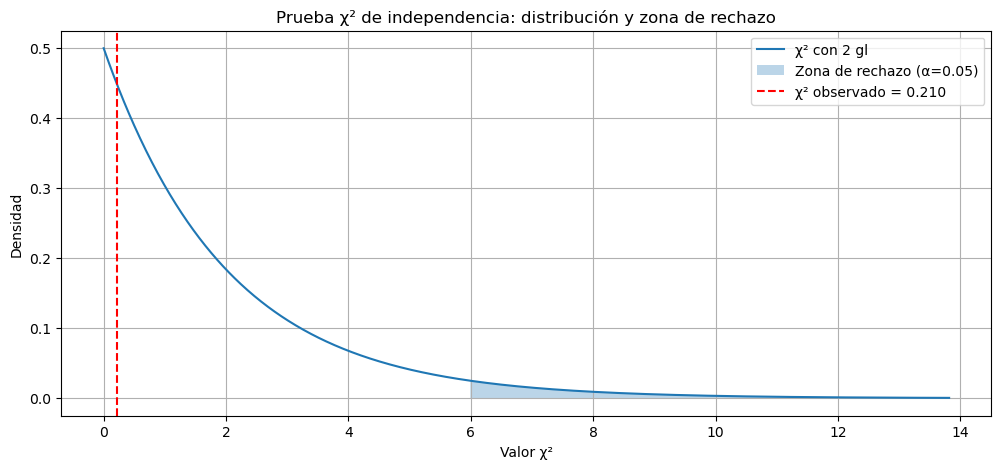

np.float64(5.99146454710798)

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Parámetros de tu prueba chi-cuadrada
dof = 2                # tabla 2×3: (2−1)(3−1)=2
chi2_obs = 0.210443    
alpha = 0.05           


x_max = chi2.ppf(0.999, dof)
x = np.linspace(0, x_max, 1000)
y = chi2.pdf(x, dof)
chi2_crit = chi2.ppf(1 - alpha, dof)

plt.figure(figsize=(12, 5))
plt.plot(x, y, label=f"χ² con {dof} gl")
x_rechazo = np.linspace(chi2_crit, x_max, 300)
plt.fill_between(x_rechazo, chi2.pdf(x_rechazo, dof), alpha=0.3, label=f"Zona de rechazo (α={alpha})")
plt.axvline(chi2_obs, linestyle='--', color = 'red',  label=f"χ² observado = {chi2_obs:.3f}")
plt.title("Prueba χ² de independencia: distribución y zona de rechazo")
plt.xlabel("Valor χ²")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()

### PASO 3. Realizar un análisis adicional:
###  Determinar si existe relación entre el costo de la póliza y si el contratante es fumador o no.

Pregunta: ¿Existen cambios (relación) en el precio promedio del costo de la póliza si el contratante es fumador o no es fumador?

#### 1) Definimos $H_0$ y $H_1$
- $H_0$: el promedio de pago de una poliza es igual entre fumadores y no fumadores $\mu_nf = \mu_f$
- $H_1$: el promedio del pago de una poliza es diferente entre fumadores y no fumadores $\mu_nf ≠ \mu_f$


In [118]:
fumador = df[df['Fumador'] == 'yes']['Costo Póliza']
no_fumador = df[df['Fumador']== 'no']['Costo Póliza']

x_f = fumador.mean()
s_f = fumador.std()
n_f = len(fumador) 

x_nf = no_fumador.mean()
s_nf = no_fumador.std()
n_nf = len(no_fumador) 

print('FUMADORES:')
print(f'Promedio de costo de póliza: {x_f}')
print(f'Desviación estándar: {s_f}')
print(f'numero de datos: {n_f}')
print('==='*40)
print('NO FUMADORES:')
print(f'Promedio de costo de póliza en no fumadores: {x_nf}')
print(f'Desviación estándar de costo de póliza en no fumadores: {s_nf}')
print(f'numero de datos de no fumadores: {n_nf}')

FUMADORES:
Promedio de costo de póliza: 32064.379807705624
Desviación estándar: 11581.734983080903
numero de datos: 231
NO FUMADORES:
Promedio de costo de póliza en no fumadores: 8195.9793046957
Desviación estándar de costo de póliza en no fumadores: 6058.17497813339
numero de datos de no fumadores: 907


#### 2) Definimos población y estadístico:
✅ Población con distribución normal 
❌ Sigma poblaciónal conocida
✅ Estadistico de prueba: **t-student** para dos muestras independientes

1) $\mu_nf$ = 8195.97 dolares
2) $\mu_f$$ = 32064.37 dolares

#### 3) Definimos $\alpha$:
$\alpha$: 0.05

Nota: Herramienta interesante en para evaluar algún estadistico. 
**Normal Distribution Calculator:** https://www.infrrr.com/distributions/normal-distributions

#### **EXTRA:** Definimos la potencia de la prueba (1-$\beta$) y el tamaño de la muestra($n$):

Comencemos definiendo el tamaño del efecto ($d$):

- 0.2: efecto "pequeño"
- 0.5: efecto "mediano"
- 0.8: efecto "grande"
 

In [122]:
from statsmodels.stats.power import TTestIndPower

# Definir tamaño del efecto, potencia de la prueba, alpha y ratio
d = 0.5
power = 0.9
alpha = 0.05
ratio = n_f/n_nf # Asumiremos n1=n2 ya que son casi similares en proporcion

# Instancia de NormalIndPower
analisis = TTestIndPower()

# Y cálculo del tamaño de la muestra
n = analisis.solve_power(
    effect_size=d,
    alpha = alpha,
    power=power,
    alternative='two-sided', # larger = unilateral derecho, smaller = unilateral izquierdo, two-sided: bilateral
    ratio = ratio # No estamos calculando proporción entre medias
)
print(f"Tamaño sugerido de cada muestra (n1=n2): {n}")

Tamaño sugerido de cada muestra (n1=n2): 208.59807780759914


### Prueba de normalidad de los dos grupos

In [124]:
from scipy.stats import shapiro

niveles = df['Fumador'].unique() # Fumador si / no
for nivel in niveles:
    # Extraer la agrupación
    grupo = df.loc[df['Fumador']== nivel,'Costo Póliza']

    # Aplicar prueba de shapiro
    W, p_shapiro = shapiro(grupo)

    # E imprimir resultado
    print(f"Grupo {nivel} - p = {p_shapiro}")

Grupo yes - p = 4.265071255617243e-08
Grupo no - p = 4.168302639723238e-27


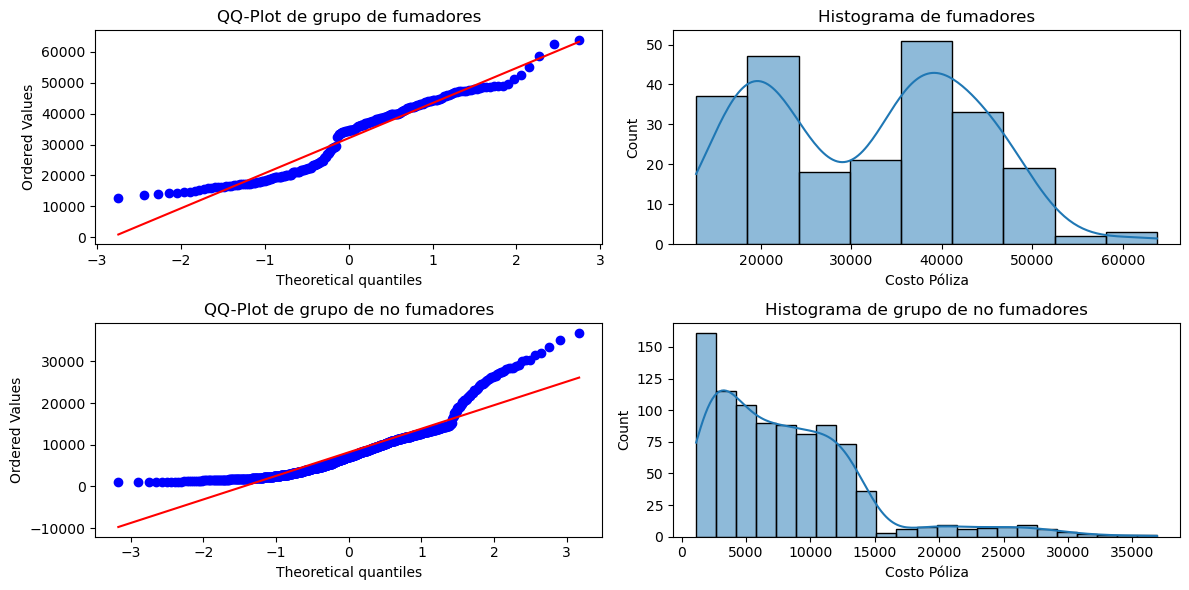

In [128]:
fig, ax = plt.subplots(2, 2, figsize = (12, 6))
stats.probplot(df.loc[df['Fumador']== 'yes','Costo Póliza'], dist="norm", plot=ax[0,0], )
ax[0,0].set_title("QQ-Plot de grupo de fumadores")
sns.histplot(df.loc[df['Fumador']== 'yes','Costo Póliza'], kde=True, ax = ax[0,1], )
ax[0,1].set_title("Histograma de fumadores")

stats.probplot(df.loc[df['Fumador']== 'no','Costo Póliza'], dist="norm", plot=ax[1,0], )
ax[1,0].set_title("QQ-Plot de grupo de no fumadores")
sns.histplot(df.loc[df['Fumador']== 'no','Costo Póliza'], kde=True, ax = ax[1,1], )
ax[1,1].set_title("Histograma de grupo de no fumadores")
plt.tight_layout()

In [131]:
from pingouin import ttest

resultados = ttest(
    x = fumador.values,
    y = no_fumador.values, # El segundo arreglo es usualmente el de referencia
    paired = False, # Porque las muestras son independientes
    alternative = 'two-sided', # Nos interesa ver si hubo incremento de la media de B con respecto a A
)
resultados

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.285007,262.848088,two-sided,1.078262e-87,"[22316.56, 25420.24]",3.177411,1.032e+144,1.0


Es evidente que el estadistico de t se encuentra hasta el otro extremos de la zona de rechazo en la región derecha, no se rechaza la hipótesis nula


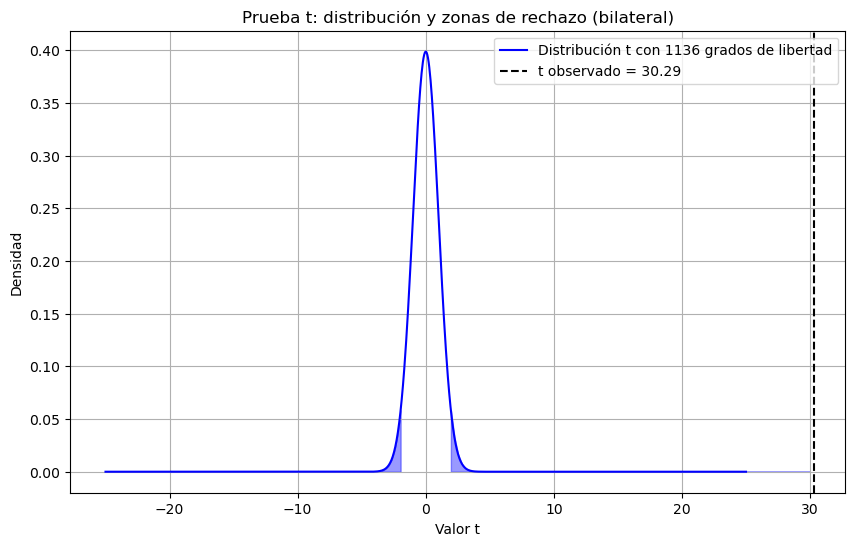

In [135]:
import matplotlib.pyplot as plt
from scipy.stats import t # La distribución t
import numpy as np

# Parámetros
alpha = 0.05
gl = n_f + n_nf - 2 # Grados de libertad

# Rango de valores t y PDF
t_vals = np.linspace(-25, 25, 1000)
pdf_vals = t.pdf(t_vals, gl) # Distribución t para "gl" grados de libertad

# Puntos críticos para alfa bilateral derecha
t_critico_izq = t.ppf(alpha/2, gl) # Zona de rechazo izquierda ASUMIENDO DISTRIBUCIÓN CON "df" GRADOS DE LIBERTAD
t_critico_der = t.ppf(1-alpha/2, gl)
# Graficar la distribución
plt.figure(figsize=(10, 6))
plt.plot(t_vals, pdf_vals, label=f"Distribución t con {gl} grados de libertad", color='blue')

# Zonas de rechazo izquierda y derecha
t_rechazo_izq = np.linspace(-25, t_critico_izq, 100) 
plt.fill_between(t_rechazo_izq, t.pdf(t_rechazo_izq, gl), color='blue', alpha=0.4)
t_rechazo_der = np.linspace(30, t_critico_der, 100) 
plt.fill_between(t_rechazo_der, t.pdf(t_rechazo_der, gl), color='blue', alpha=0.4)

# Calcular la estadística de esta prueba
tval = (x_f-x_nf)/(np.sqrt((s_f)**2/n_f + (s_nf)**2/n_nf))

# Y dibujar esta estadística en la distribución anterior
plt.axvline(tval, color='black', linestyle='--', label=f't observado = {tval:.2f}')

# Etiquetas
plt.title('Prueba t: distribución y zonas de rechazo (bilateral)')
plt.xlabel('Valor t')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
print('Es evidente que el estadistico de t se encuentra hasta el otro extremos de la zona de rechazo en la región derecha, se rechaza la hipótesis nula y se acepta la hipotesis aletrnativa')

#  REPORTE EJECUTIVO


## 📝 DATASET:
Es importante destacar que la naturaleza del dataset no permite el desarrollo de pruebas de estadística inferencial paramétrica, sino no paramétricas, dado que los datos no muestran una distribución normal en ninguna de las variables analizadas. Seleccionamos la prueba de normalidad de Shapiro-Wilk, ya que contrasta específicamente si los datos siguen una distribución normal a partir de una combinación de ordenamientos y varianzas. Por otra parte, pruebas como Kolmogorov-Smirnov son menos específicas, pues constituyen una prueba general de bondad de ajuste, no limitada únicamente a la normalidad, y pueden aplicarse a cualquier distribución de referencia.

>Dicho esto, se aplicó la prueba de Shapiro-Wilk y, adicionalmente, se utilizaron herramientas gráficas (Q-Q plot e histogramas), lo que reforzó la evidencia de que los datos no cumplen con el supuesto de normalidad.
                    
## 1️⃣ Ejercicio No. 1
Conocemos la media de la población y suponemos una distribución normal. Sin embargo, no conocemos la desviación estándar (σ). Dado que es desconocida, utilizamos el estadístico t de Student unilateral (cola izquierda).

Como se observa en el apartado Ejercicio No. 1, la distribución del estadístico t y el valor crítico muestran que nuestro valor de t se posiciona lejos de la zona de rechazo (α=0.05). 
>Por lo tanto, no se rechaza la hipótesis nula. Es decir, el promedio de pago de una póliza es igual al promedio poblacional; no existen diferencias estadísticamente significativas. Esto se corroboró con el análisis del valor p, donde se obtuvo p > 0.05.
         
## 2️⃣ Ejercicio No. 2
No conocemos la media ni la desviación estándar de la población. En este caso, utilizamos el estadístico t de Student para dos muestras independientes (mujeres vs. hombres). Como se observa en el apartado Ejercicio No. 2, la distribución del estadístico t y el valor crítico muestran que nuestro valor de t se encuentra dentro de la zona de rechazo  α = 0.05. 

>Por lo tanto, se rechaza la hipótesis nula y se acepta la hipótesis alternativa. Es decir, la diferencia en el IMC promedio de hombres es estadísticamente mayor que la de mujeres. Esto se corroboró con el análisis del valor p, donde se obtuvo  p < 0.05.

## 3️⃣ Ejercicio No. 3
No conocemos la media ni la desviación estándar de la población, pero contamos con más de tres medias de diferentes grupos (0, 1 y 2 hijos). Por lo tanto, utilizamos un ANOVA de un factor.

Previo a la prueba, se aplicó Shapiro-Wilk en cada grupo, lo que evidenció que no cumplen normalidad. Además, se realizó una prueba de homocedasticidad (Bartlett) para evaluar la igualdad de varianzas entre grupos, obteniéndose p>0.05, lo que confirma homogeneidad de varianzas. Como se observa en el apartado Ejercicio No. 3, la distribución del estadístico F y su valor crítico muestran que nuestro valor de F cae en la zona de rechazo (α=0.05). 
>Por lo tanto, se rechaza la hipótesis nula y se acepta la hipótesis alternativa. Es decir, existen diferencias en la media del costo de la póliza en relación con el número de hijos. Esto se corroboró con el análisis del valor p (p<0.05).

>**Nota: Será necesario realizar una prueba post hoc para determinar entre cuáles grupos existen dichas diferencias o si todos los grupos difieren entre sí en el promedio del costo de la póliza**

## 4️⃣ Ejercicio No. 4
La población se modela con distribución binomial/multinomial. Dado que σ es desconocida y trabajamos con dos variables categóricas (género y cantidad de hijos), se aplicó la prueba de Ji-Cuadrada de independencia (Pearson).
Como se observa en el apartado Ejercicio No. 4, el valor del estadístico χ2=0.210 χ2=0.210 se posiciona fuera de la zona de rechazo (α=0.0). Por lo tanto, no se rechaza la hipótesis nula. 
>En otras palabras, las proporciones de hijos (0, 1 y 2) son iguales en hombres y mujeres; la probabilidad de tener cierta cantidad de hijos es independiente del género del contratante. Esto se corroboró con el valor p obtenido (p>0.05).
        
## 5️⃣ Ejercicio No. 5
Población con distribución normal, sin conocer. Dado que la desviación estándar poblacional es desconocida y tenemos dos grupos (fumadores y no fumadores), se utilizó la prueba t de Student para dos muestras independientes, bilateral (dos colas).
Como se observa en el apartado Ejercicio No. 5, el valor del estadístico t (30.29) cae dentro de la zona de rechazo (α = 0.05). En consecuencia, se rechaza la hipótesis nula y se acepta la hipótesis alternativa. 
>Es decir, existen diferencias significativas entre fumadores y no fumadores en el promedio de la variable analizada. Esto se corroboró con el análisis del valor p (p<0.05).
